## Pytorch基础
### Variable(变量)
在`torch.autograd.Variable`里面，将`tensor`变成`Variable`只需要`Variable(a)`即可

In [8]:
from torch.autograd import Variable
import torch
x = Variable(torch.Tensor([1]),requires_grad=True)
w = Variable(torch.Tensor([2]),requires_grad=True)
b = Variable(torch.Tensor([3]),requires_grad=True)

y = w*x+b

y.backward()
print(x.grad)
print(w.grad)
print(b.grad)

tensor([2.])
tensor([1.])
tensor([1.])


In [9]:
#### 矩阵自动求梯度

x= torch.randn(3)
x = Variable(x,requires_grad=True)
y = x*2
print(y)
y.backward(torch.FloatTensor([1,0.1,0.01]))
print(x.grad)

## dataset
import torch.utils.data.dataset


tensor([-0.1121, -2.2209,  1.2579], grad_fn=<MulBackward0>)
tensor([2.0000, 0.2000, 0.0200])


$$y=w^Tx_i+b$$
$$w^*=\argmin_w\left(y-Xw\right)^T \left(y-Xw\right)$$


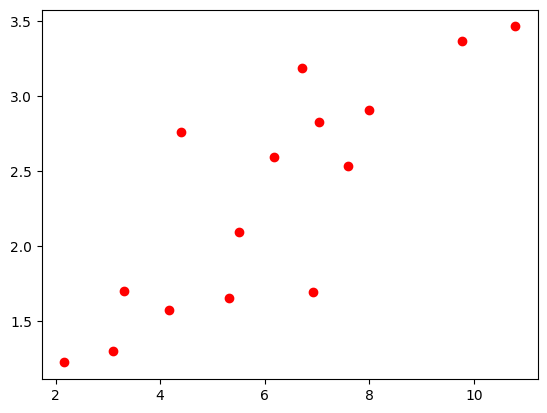

In [10]:
import numpy as np
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                    [9.779],[6.182],[7.59],[2.167],[7.042],
                    [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                    [3.366],[2.596],[2.53],[1.221],[2.827],
                    [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
import pylab as plt
plt.plot(x_train,y_train,'ro',label='origin data')

In [11]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                    [9.779],[6.182],[7.59],[2.167],[7.042],
                    [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                    [3.366],[2.596],[2.53],[1.221],[2.827],
                    [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()

import torch.nn as nn
class LinearRegression(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.Linear = nn.Linear(1,1)
    
    def forward(self,x):
        out = self.Linear(x)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LinearRegression().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

num_epochs=1000
for epoch in range(num_epochs):
    input = x_train.to(device)
    target = y_train.to(device)
    out = model(input)
    loss = criterion(out,target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(epoch+1) % 20==0:
        print(f'Epoch[{epoch+1}/{num_epochs}],loss:{loss.item():.6f}')      


Epoch[20/1000],loss:1.562923
Epoch[40/1000],loss:0.371414
Epoch[60/1000],loss:0.337635
Epoch[80/1000],loss:0.335056
Epoch[100/1000],loss:0.333335
Epoch[120/1000],loss:0.331654
Epoch[140/1000],loss:0.329990
Epoch[160/1000],loss:0.328344
Epoch[180/1000],loss:0.326714
Epoch[200/1000],loss:0.325101
Epoch[220/1000],loss:0.323505
Epoch[240/1000],loss:0.321925
Epoch[260/1000],loss:0.320361
Epoch[280/1000],loss:0.318813
Epoch[300/1000],loss:0.317280
Epoch[320/1000],loss:0.315764
Epoch[340/1000],loss:0.314263
Epoch[360/1000],loss:0.312777
Epoch[380/1000],loss:0.311307
Epoch[400/1000],loss:0.309851
Epoch[420/1000],loss:0.308411
Epoch[440/1000],loss:0.306985
Epoch[460/1000],loss:0.305574
Epoch[480/1000],loss:0.304177
Epoch[500/1000],loss:0.302794
Epoch[520/1000],loss:0.301426
Epoch[540/1000],loss:0.300071
Epoch[560/1000],loss:0.298731
Epoch[580/1000],loss:0.297404
Epoch[600/1000],loss:0.296090
Epoch[620/1000],loss:0.294790
Epoch[640/1000],loss:0.293504
Epoch[660/1000],loss:0.292230
Epoch[680/1000

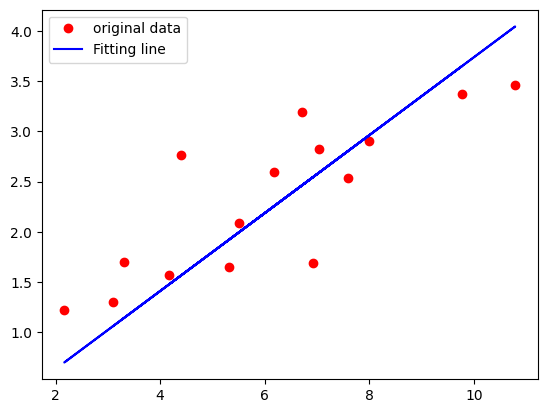

In [12]:
model.eval()
with torch.no_grad():
    predict = model(x_train).cpu().numpy()
plt.plot(x_train.cpu().numpy(),y_train.cpu().numpy(),'ro',label="original data")
plt.plot(x_train.cpu().numpy(),predict,'b-',label='Fitting line')
plt.legend()
plt.show()

In [13]:
import torch.nn as nn
class AlexNet(nn.Module):
    def __init__(self,num_classes):
        super(AlexNet,self).__init__()

        self.features =nn.Sequential(
            nn.Conv2d(3,64,kernel_size=11,stride=4,padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(64,192,kernel_size=5,padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(192,384,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384,256,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2),)
        self.classifier=nn.Sequential(
            nn.Dropout(),
            nn.Linear(256*6*6,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096,4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096,num_classes),)

    def forward(self,x):
        x = self.features(x)
        x=x.view(x.size(0),256*6*6)
        x = self.classes(x)
        return x

In [14]:
class BasicConv2d(nn.Module):
    def __init__(self,in_channels,out_channels,**kwargs):
        super(BasicConv2d,self).__init__()
        self.conv = nn.Conv2d(in_channels,out_channels,bias=False,**kwargs)
        self.bn =  nn.BatchNorm2d(out_channels,eps=0.001)

    def forward(self,x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x,inplace=True)


In [16]:

basic_run = nn.RNN(input_size=20,hidden_size=50,num_layers=2)

In [17]:
basic_run.weight_ih_l0


Parameter containing:
tensor([[-1.1226e-02, -7.8064e-02, -7.3393e-02, -2.3307e-02,  1.1283e-01,
          1.1566e-01,  7.0799e-02, -1.1970e-02, -6.8283e-02,  1.1819e-01,
          1.3554e-01, -1.0744e-02,  5.2224e-02, -1.2486e-01, -2.7102e-02,
         -3.8305e-02,  7.8703e-02, -8.9959e-02,  4.6199e-02,  1.5797e-02],
        [ 1.0701e-01, -9.4814e-02, -3.6684e-02, -7.6493e-02, -7.8315e-02,
          8.7239e-02, -6.2401e-02, -5.6125e-02,  1.2136e-02,  6.4010e-02,
         -1.1601e-01, -1.2412e-02, -4.3338e-02,  1.2104e-01, -1.0593e-01,
         -7.9290e-02,  1.1778e-01, -7.6734e-02,  8.0228e-02,  7.2174e-02],
        [-1.1764e-01,  2.7350e-02,  8.6977e-02, -6.8523e-02,  7.7146e-02,
         -7.7171e-02,  4.1921e-02,  4.1586e-02,  9.5329e-02,  1.1362e-03,
         -1.3824e-01, -2.1643e-02, -5.5395e-02, -3.4142e-02, -2.4047e-02,
         -9.7422e-02, -1.0611e-01, -4.7963e-02,  1.1768e-01,  8.4737e-02],
        [ 9.9233e-02, -9.6133e-02,  1.0310e-01,  4.9592e-02,  3.0755e-02,
         -3.2

In [18]:
basic_run.weight_hh_l0

Parameter containing:
tensor([[ 0.1310, -0.0359, -0.0531,  ..., -0.0661, -0.0532, -0.0097],
        [ 0.0631,  0.0693,  0.0391,  ..., -0.0657, -0.1083,  0.0211],
        [ 0.0463,  0.0202, -0.0717,  ...,  0.1239, -0.0442,  0.1362],
        ...,
        [ 0.0133, -0.0500,  0.0043,  ...,  0.0139, -0.0398, -0.1335],
        [-0.0624,  0.0338,  0.0484,  ..., -0.0240, -0.0411, -0.0203],
        [-0.1326, -0.0014, -0.0653,  ...,  0.1360,  0.0548, -0.0245]],
       requires_grad=True)

In [19]:
toy_input = Variable(torch.randn(100,32,20))

In [20]:
h_0 = Variable(torch.randn(2,32,50))

In [21]:
toy_output ,h_n = basic_run(toy_input,h_0)
print(toy_output.size())
print(h_n.size())

torch.Size([100, 32, 50])
torch.Size([2, 32, 50])


In [22]:
lstm = nn.LSTM(input_size=20,hidden_size=50,num_layers=2)

In [23]:
lstm_output, (h_n,c_n) = lstm(toy_input)

In [24]:
print(lstm_output.size())

torch.Size([100, 32, 50])


In [25]:
print(h_n.size())

torch.Size([2, 32, 50])


In [26]:
c_n.size()


torch.Size([2, 32, 50])